# News_Mood
## Analysis
* On the day, Jan 7, 2017, and time, around 9pm pct, it seems that between the 5 News media outlets that are being analyzed and are active on twitter CNN seems to be the most positive on average and FoxNews the most negative on average.
* The python language sentiment analysis package being used for this project, VADER, does have it's faults when analyzing twitter "tweets" and as result many of the "tweets" that where analyzed return a completely neutral result.
* Of the 5 News media outlets the only major newspaper publication firm is the New York Times and the sentiment analysis done in this project on it shows that it is the most neutral of all the News outlets being analyzed.

In [1]:
import tweepy, config, time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 

In [2]:
auth = tweepy.OAuthHandler(config.consumer_key, config.consumer_secret)
auth.set_access_token(config.access_token, config.access_token_secret)
api = tweepy.API(auth)

In [3]:
news_account = ['@BBCNews', '@CBSNews', '@CNN', '@FoxNews', '@NYT']

In [4]:
df = pd.DataFrame()

## Gather and Dataframe Last 100 Tweets from News Media

In [5]:
for news in news_account:
    timestamp = []
    tweet_text = []
    sentiment_compound = []
    sentiment_positive = []
    sentiment_negative = []
    sentiment_neutral = []
    
    for tweet in tweepy.Cursor(api.user_timeline, id=news).items(100):
        try:
            strp_time = time.strptime(str(tweet.created_at), "%Y-%m-%d %H:%M:%S")
            fmt_time = time.strftime("%m/%d/%Y %H:%M:%S", strp_time)
            timestamp.append(fmt_time)
            tweet_text.append(tweet.text)
            
            analyzer = SentimentIntensityAnalyzer()
            sentiment_compound.append(analyzer.polarity_scores(tweet.text)['compound'])
            sentiment_positive.append(analyzer.polarity_scores(tweet.text)['pos'])
            sentiment_negative.append(analyzer.polarity_scores(tweet.text)['neg'])
            sentiment_neutral.append(analyzer.polarity_scores(tweet.text)['neu'])
            
            
        except tweepy.RateLimitError:
            time.sleep(60*15)

    df[news[1:] + '_timestamp'] = timestamp
    df[news[1:] + '_tweet_text'] = tweet_text
    df[news[1:] + '_cmpd_sntmt'] = sentiment_compound
    df[news[1:] + '_pos_sntmt'] = sentiment_positive
    df[news[1:] + '_neg_sntmt'] = sentiment_negative
    df[news[1:] + '_neu_sntmt'] = sentiment_neutral

## Save Data into CSV File

In [6]:
df.to_csv('data/select_news_twitter_sentiment_{}.csv'.format(time.strftime("%m-%d-%y_%H%M", time.gmtime())))

## Plot Data for Analysis

In [7]:
# convert stored dataframe into a plot friendly dataframe
df_plot = df[[df.columns[2], df.columns[8], df.columns[14], df.columns[20], df.columns[26]]]
df_plot = df_plot.rename(columns={
    df_plot.columns[0]:df_plot.columns[0][:-11],
    df_plot.columns[1]:df_plot.columns[1][:-11],
    df_plot.columns[2]:df_plot.columns[2][:-11],
    df_plot.columns[3]:df_plot.columns[3][:-11],
    df_plot.columns[4]:df_plot.columns[4][:-11]
})

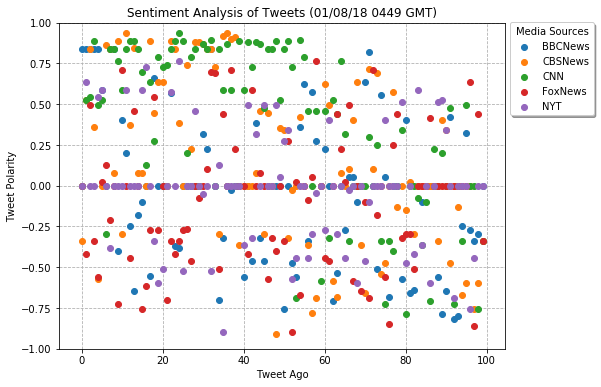

In [11]:
fig, ax = plt.subplots(figsize=(10,6))

for column in df_plot.columns:
    ax.scatter(x=df_plot.index, y=df_plot[column], zorder=3)

ax.set_title('Sentiment Analysis of Tweets ({} GMT)'.format(time.strftime("%m/%d/%y %H%M", time.gmtime())))
ax.set_xlabel('Tweet Ago')
ax.set_ylabel('Tweet Polarity')
ax.set_ylim(-1,1)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

ax.legend(loc=3, bbox_to_anchor=(1, .70), shadow=True, title='Media Sources')
ax.grid(ls='dashed', zorder=0)

plt.show()

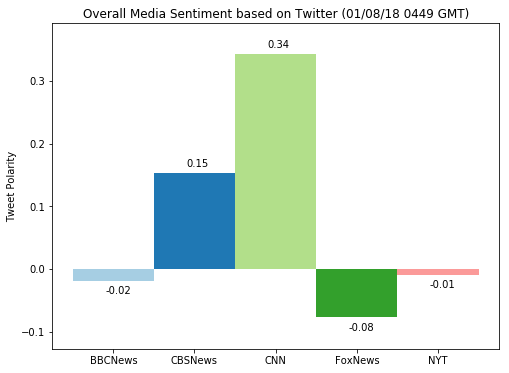

In [12]:
fig, ax = plt.subplots(figsize=(8,6)) 

ax.bar(x=df_plot.columns, height=df_plot.mean(), width=1, color=plt.cm.Paired(np.arange(len(df_plot))))
ax.set_title('Overall Media Sentiment based on Twitter ({} GMT)'.format(time.strftime("%m/%d/%y %H%M", time.gmtime())))
ax.set_ylabel('Tweet Polarity')
ax.set_ylim(bottom=min(df_plot.mean() - .05), top=max(df_plot.mean() + .05))


for bar in ax.patches:
    if bar.get_height() < 0:
        num_loc = bar.get_height() - .02
    else:
        num_loc = bar.get_height() + .01
    
    ax.text(bar.get_x() + .40, num_loc, "{:.2f}".format(bar.get_height()))

plt.show()